In [0]:
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
import math

# **Data science labour market analysis for Poland**
*Data comes from indeed.com*

In [0]:
URL="https://pl.indeed.com/praca?as_and=data+science&as_phr=&as_any=&as_not=&as_ttl=&as_cmp=&jt=all&st=&as_src=&radius=25&l=polska&fromage=any&limit=50&sort=&psf=advsrch"
page = requests.get(URL)
soup = BeautifulSoup(page.text)
# print(soup.prettify())

In [4]:
def extract_job_title_from_result(soup): 
  jobs = []
  for div in soup.find_all(name="div", attrs={"class":"row"}):
      for a in div.find_all(name="a", attrs={"data-tn-element":"jobTitle"}):
        jobs.append(a["title"])
  return(jobs)
extract_job_title_from_result(soup)

['Data Scientist',
 'Data Scientist (Data Science)',
 'Data Science Lead',
 'DATA SCIENCE CONSULTANT WARSAW',
 'STAŻYSTA W ZESPOLE DATA SCIENCE',
 'Programista Data Science',
 'Młodszy analityk danych - Data Science (Risk Hub Warsaw)',
 'Internship in Data Science Team',
 'Junior DevOps Engineer (Data Science)',
 'PMO Specialist - Data Science',
 'R&D Data Scientist',
 'Ekspert DATA SCIENCE i ANALIZ',
 'Leadership Development Programme m/f - 2019',
 'Data Engineer – Advanced Analytics',
 'Data Scientist',
 'Pathways Internship in Poland m/f - summer 2019',
 'Data Scientist I',
 'Junior Data Scientist',
 'DevOps Engineer (Data Science)',
 'Data Scientist / Analityk i Developer Systemów Przetwarzania Danych',
 'Data Scientist',
 'Data Engineer',
 'Oracle Data Warehouse Developer',
 'Data Scientist for Commodities Markets',
 'Data Science Analyst',
 'Młodszy analityk danych - Data Science',
 'Global Medical Science Liaison Ophthalmology based in Poland, also responsible for Russia',
 'Dat

In [5]:
def extract_company_from_result(soup): 
  companies = []
  for div in soup.find_all(name="div", attrs={"class":"row"}):
    company_element = div.find(name="span", attrs={"class":"company"})
    companies.append(company_element.text.strip())
  return(companies)
      
extract_company_from_result(soup)


['Arup',
 'ING',
 'Citi',
 'managementsolutions',
 'PKO Bank Polski',
 'Assesco',
 'ING Services Polska',
 'UBS',
 'ING',
 'Accenture',
 'ABB',
 'Polbank',
 'Amazon Fulfillment Poland sp.',
 'ING',
 'Britenet',
 'Amazon Fulfillment Poland sp.',
 'iQor',
 'Atos',
 'ING',
 'Talex',
 'EY',
 'Credit Suisse',
 'Accenture',
 'Refinitiv',
 'Aplikacje Krytyczne',
 'ING Tech Poland',
 'Roche',
 'NOKIA',
 'Akamai',
 'Shell',
 'Innovation in IT (IIIT)',
 'Management Solutions',
 'Lingaro',
 'Egnyte',
 'gcesolutions',
 'Accenture',
 'McKinsey & Company',
 'S-Labs',
 'Syneos Health Clinical',
 'IQVIA',
 'AMZN Dev Cntr Poland sp. z.o.o',
 'Ericsson',
 'MediaCom',
 'Credit Suisse',
 'Revolut',
 'Ocado',
 'Goldman Sachs',
 'Accenture',
 'Google',
 'ING']

In [6]:
def extract_location_from_result(soup): 
  locations = []
  spans = soup.findAll("span", attrs={"class": "location"})
  for span in spans:
    locations.append(span.text)
  return(locations)
extract_location_from_result(soup)

['Polska',
 'Polska',
 'Polska',
 'Polska',
 'Warszawa, mazowieckie',
 'Lublin, lubelskie',
 'Polska',
 'Kraków, małopolskie',
 'Polska',
 'Warszawa, mazowieckie',
 'Kraków, małopolskie',
 'Warszawa, mazowieckie',
 'Polska',
 'Polska',
 'Poznań, wielkopolskie',
 'Polska',
 'Warszawa, mazowieckie',
 'Kraków, małopolskie',
 'Polska',
 'Polska',
 'Wrocław, dolnośląskie',
 'Wrocław, dolnośląskie',
 'Polska',
 'Gdynia, pomorskie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Polska',
 'Wrocław, dolnośląskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Polska',
 'Poznań, wielkopolskie',
 'Polska',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Kraków, małopolskie',
 'Polska',
 'Warszawa, mazowieckie',
 'Gdańsk, pomorskie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Wrocław, dolnośląskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Warszawa, mazowieckie',
 'Polska',
 'Warszawa, mazowieckie',
 'Polska'

# **Making a date frame**

In [7]:
job_titles = extract_job_title_from_result(soup)
companies = extract_company_from_result(soup)
locations = extract_location_from_result(soup)

data = list(zip(job_titles, companies, locations))
df=pd.DataFrame(data, columns=["Job title", "Company", "Location"])
df

,Job title,Company,Location
0,Data Scientist,Arup,Polska
1,Data Scientist (Data Science),ING,Polska
2,Data Science Lead,Citi,Polska
3,DATA SCIENCE CONSULTANT WARSAW,managementsolutions,Polska
4,STAŻYSTA W ZESPOLE DATA SCIENCE,PKO Bank Polski,"Warszawa, mazowieckie"
5,Programista Data Science,Assesco,"Lublin, lubelskie"
6,Młodszy analityk danych - Data Science (Risk H...,ING Services Polska,Polska
7,Internship in Data Science Team,UBS,"Kraków, małopolskie"
8,Junior DevOps Engineer (Data Science),ING,Polska
9,PMO Specialist - Data Science,Accenture,"Warszawa, mazowieckie"


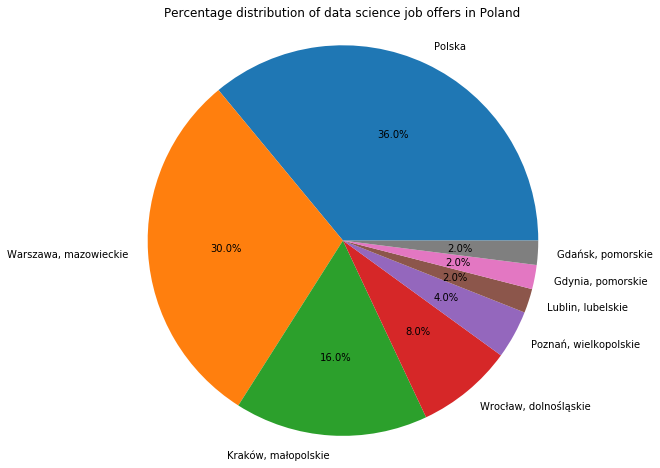

In [8]:
plt.figure(figsize=(10,8))
df.Location.value_counts().plot.pie(autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage distribution of data science job offers in Poland')
plt.ylabel('')
plt.show()

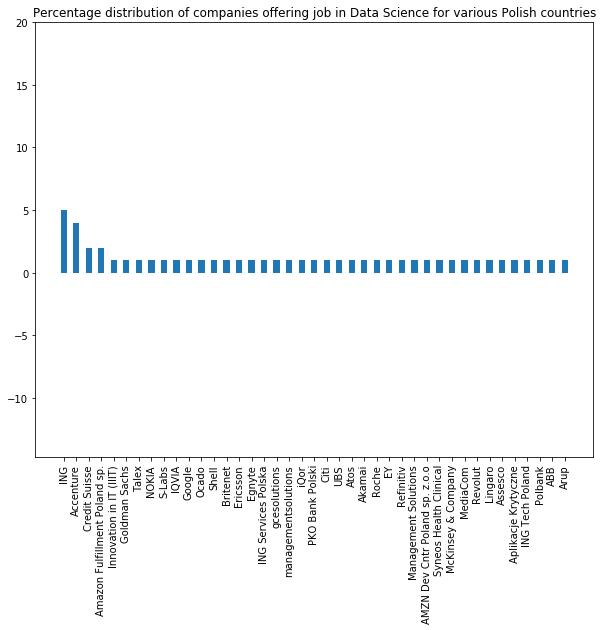

In [9]:
plt.figure(figsize=(10,8))
df.Company.value_counts().plot.bar()
plt.axis('equal')
plt.title('Percentage distribution of companies offering job in Data Science for various Polish countries')
plt.ylabel('')
plt.show()

# **Detailed data for Warsaw**

In [0]:
URL = "https://pl.indeed.com/praca?as_and=data+science&as_phr=&as_any=&as_not=&as_ttl=&as_cmp=&jt=all&st=&as_src=&radius=25&l=Warszawa%2C+mazowieckie&fromage=any&limit=50&sort=&psf=advsrch"
page = requests.get(URL)
soup = BeautifulSoup(page.text)
# print(soup.prettify())

In [11]:
def extract_job_title_from_result_Warszawa(soup): 
  jobs = []
  for div in soup.find_all(name="div", attrs={"class":"row"}):
      for a in div.find_all(name="a", attrs={"data-tn-element":"jobTitle"}):
        jobs.append(a["title"])
  return(jobs)
extract_job_title_from_result_Warszawa(soup)

['STAŻYSTA W ZESPOLE DATA SCIENCE',
 'Młodszy analityk danych - Data Science',
 'Data Scientist I',
 'Data Science Analyst',
 'Junior DevOps Engineer (Data Science)',
 'Data Product Developer',
 'Data Science Senior Analyst',
 'PMO Specialist - Data Science',
 'Ekspert DATA SCIENCE i ANALIZ',
 'DATA SCIENCE CONSULTANT',
 'Junior/Mid Data Scientist',
 'Data Scientist',
 'DATA SCIENTIST | MediaCom',
 'Junior DevOps Engineer (Data Science)',
 'Applied Intelligence Big Data Scientist',
 'Data Engineer (m/f) | Warsaw',
 'Junior Data Engineer',
 'Junior Specialist',
 'Frontend Developer (Data Visualization Specialist)',
 'Data Scientist',
 'Data Scientist, Google Cloud',
 '(Senior) Data Scientist w zespole Data Science',
 'Data Scientist - Advanced Analytics',
 'Data Scientist, Market Data - Data Intelligence',
 'DATA SCIENCE CONSULTANT WARSAW',
 '(Senior) Machine Learning Engineer w zespole Data Science',
 'Data Scientist - R',
 'Medcial Science Liaison Immunology',
 'Data Scientist',
 'Jun

In [12]:
def extract_company_from_result_Warszawa(soup): 
  companies = []
  for div in soup.find_all(name="div", attrs={"class":"row"}):
    company_element = div.find(name="span", attrs={"class":"company"})
    companies.append(company_element.text.strip())
  return(companies)
      
extract_company_from_result_Warszawa(soup)

['PKO Bank Polski',
 'ING Tech Poland',
 'iQor',
 'Aplikacje Krytyczne',
 'ING Tech Poland',
 'CWT',
 'Citi',
 'Accenture',
 'Polbank',
 'Management Solutions',
 'Innovation in IT (IIIT)',
 'Ericsson',
 'MediaCom',
 'ING Services Polska',
 'Accenture',
 'Kreditech Holding SSL GmbH',
 'The Royal Bank of Scotland',
 'GfK',
 'Accenture',
 'IQVIA',
 'Google',
 'EY',
 'McKinsey & Company',
 'Goldman Sachs',
 'Management Solutions',
 'EY',
 'IQVIA',
 'Takeda Pharmaceuticals',
 'GfK',
 'RBS',
 'Credit Suisse',
 'Accenture',
 'ING Services Polska',
 'Google',
 'Workday',
 'Uniwersytet Warszawski',
 'Accenture',
 'Procter and Gamble',
 'Premier Research Group Limited',
 'IQVIA',
 'GfK',
 'Compensa',
 'Roche',
 'IQVIA',
 'Lingaro Group',
 'AstraZeneca',
 'Credit Suisse',
 'TUiR WARTA S.A.',
 'IQVIA',
 'Finitec Sp. z o.o.']

In [13]:
def extract_location_from_result_Warszawa(soup): 
  locations = []
  spans = soup.findAll("span", attrs={"class": "location"})
  for span in spans:
    locations.append(span.text)
  return(locations)
extract_location_from_result_Warszawa(soup)

['Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, mazowieckie',
 'Warszawa, 

In [14]:
job_titles = extract_job_title_from_result_Warszawa(soup)
companies = extract_company_from_result_Warszawa(soup)
locations = extract_location_from_result_Warszawa(soup)

data_Warszawa = list(zip(job_titles, companies, locations))
pd.DataFrame(data, columns=["Job title", "Company", "Location"])
pd_Warszawa= pd.DataFrame(data, columns=["Job title", "Company", "Location"])

pd_Warszawa

,Job title,Company,Location
0,Data Scientist,Arup,Polska
1,Data Scientist (Data Science),ING,Polska
2,Data Science Lead,Citi,Polska
3,DATA SCIENCE CONSULTANT WARSAW,managementsolutions,Polska
4,STAŻYSTA W ZESPOLE DATA SCIENCE,PKO Bank Polski,"Warszawa, mazowieckie"
5,Programista Data Science,Assesco,"Lublin, lubelskie"
6,Młodszy analityk danych - Data Science (Risk H...,ING Services Polska,Polska
7,Internship in Data Science Team,UBS,"Kraków, małopolskie"
8,Junior DevOps Engineer (Data Science),ING,Polska
9,PMO Specialist - Data Science,Accenture,"Warszawa, mazowieckie"


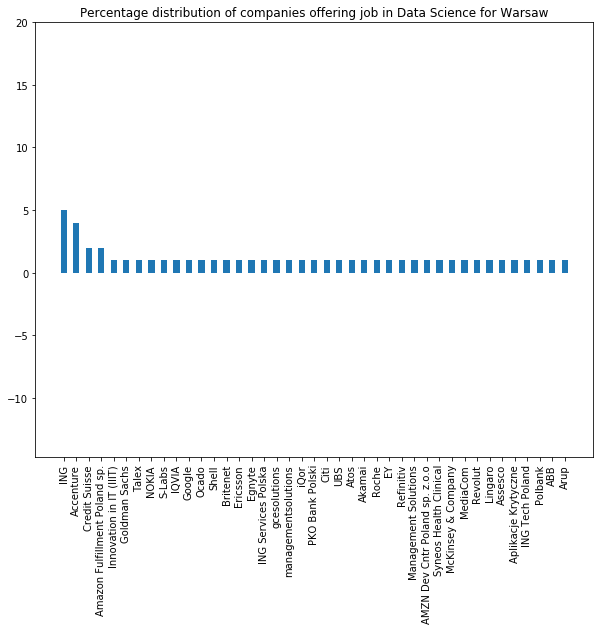

In [15]:
plt.figure(figsize=(10,8))
pd_Warszawa.Company.value_counts().plot.bar()
plt.axis('equal')
plt.title('Percentage distribution of companies offering job in Data Science for Warsaw')
plt.ylabel('')
plt.show()

# **Detailed data for Wroclaw**

In [0]:
URL = "https://pl.indeed.com/praca?q=Data+Scientist&l=Wroc%C5%82aw%2C+dolno%C5%9Bl%C4%85skie&limit=50"
page = requests.get(URL)
soup = BeautifulSoup(page.text)
# print(soup.prettify())

In [17]:
def extract_job_title_from_result_Wroclaw(soup): 
  jobs = []
  for div in soup.find_all(name="div", attrs={"class":"row"}):
      for a in div.find_all(name="a", attrs={"data-tn-element":"jobTitle"}):
        jobs.append(a["title"])
  return(jobs)
extract_job_title_from_result_Wroclaw(soup)

['Data Scientist',
 'Associate Scientist - Data Transparency',
 'Market Data Engineering - Data Scientist',
 'Data Scientist',
 'Associate Scientist - Semantic and Data Modeling',
 'Data Scientist (Ref;: EK/0118)',
 'Data Scientist (Ref;: EK/0118)',
 'Data Scientist - EMEA Advanced Analytics',
 'Data Analyst - Business Intelligence, MicroStrategy',
 'Data Scientist',
 'Scientist Technical Services Applied Bioinformatics',
 'Senior Data Scientist/Software Engineer',
 'Python Developer',
 'Scientist Technical Services Applied Bioinformatics',
 'Software Developer (Java)']

In [18]:
def extract_company_from_result_Wroclaw(soup): 
  companies = []
  for div in soup.find_all(name="div", attrs={"class":"row"}):
    company_element = div.find(name="span", attrs={"class":"company"})
    companies.append(company_element.text.strip())
  return(companies)
      
extract_company_from_result_Wroclaw(soup)

['EY',
 'XL Catlin',
 'Credit Suisse',
 'Infermedica',
 'XL Catlin',
 'MARGO CONSULTING',
 'Margo Conseil',
 'McKinsey & Company',
 'XL Catlin',
 'CPL EU',
 'QIAGEN',
 'Credit Suisse',
 'Dorwij Nerda',
 'Devire',
 'Michael Page']

In [19]:
def extract_location_from_result_Wroclaw(soup): 
  locations = []
  spans = soup.findAll("span", attrs={"class": "location"})
  for span in spans:
    locations.append(span.text)
  return(locations)
extract_location_from_result_Wroclaw(soup)

['Wrocław, dolnośląskie',
 'Wrocław, dolnośląskie',
 'Wrocław, dolnośląskie',
 'Wrocław, dolnośląskie',
 'Wrocław, dolnośląskie',
 'Wrocław, dolnośląskie',
 'Wrocław, dolnośląskie',
 'Wrocław, dolnośląskie',
 'Wrocław, dolnośląskie',
 'Wrocław, dolnośląskie',
 'Wrocław, dolnośląskie',
 'Wrocław, dolnośląskie',
 'Wrocław, dolnośląskie',
 'Wrocław, dolnośląskie',
 'Wrocław, dolnośląskie']

In [0]:
job_titles = extract_job_title_from_result_Wroclaw(soup)
companies = extract_company_from_result_Wroclaw(soup)
locations = extract_location_from_result_Wroclaw(soup)

data = list(zip(job_titles, companies, locations))
pd.DataFrame(data, columns=["Job title", "Company", "Location"])

pd_Wroclaw = pd.DataFrame(data, columns=["Job title", "Company", "Location"])

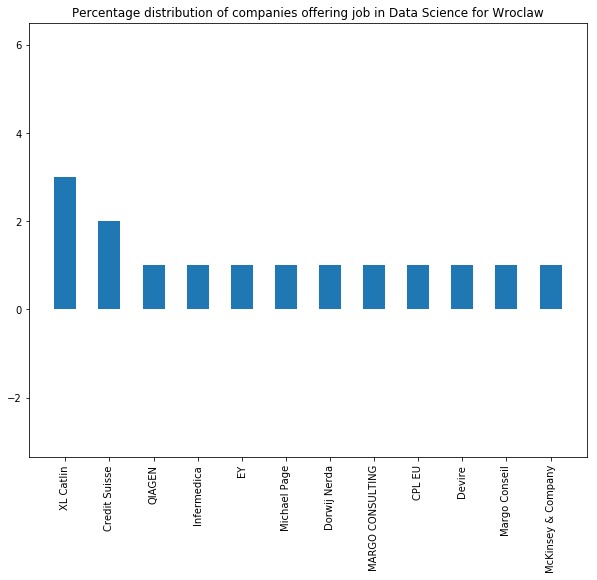

In [21]:
plt.figure(figsize=(10,8))
pd_Wroclaw.Company.value_counts().plot.bar()
plt.axis('equal')
plt.title('Percentage distribution of companies offering job in Data Science for Wroclaw')
plt.ylabel('')
plt.show()

# **Detailed data for Krakow**

In [0]:
URL = "https://pl.indeed.com/praca?as_and=data+science&as_phr=&as_any=&as_not=&as_ttl=&as_cmp=&jt=all&st=&as_src=&radius=25&l=Krak%C3%B3w&fromage=any&limit=50&sort=&psf=advsrch"
page = requests.get(URL)
soup = BeautifulSoup(page.text)
# print(soup.prettify())

In [23]:
def extract_job_title_from_result_Krakow(soup): 
  jobs = []
  for div in soup.find_all(name="div", attrs={"class":"row"}):
      for a in div.find_all(name="a", attrs={"data-tn-element":"jobTitle"}):
        jobs.append(a["title"])
  return(jobs)
extract_job_title_from_result_Krakow(soup)

['Internship in Data Science Team',
 'R&D Data Scientist',
 'Data Scientist',
 'Junior Data Scientist',
 'Data Scientist (Python)',
 'Data Scientist',
 'Team Lead - Data Science',
 'Data Scientist',
 'Data Scientist',
 'Expert in Data Science, Algorithms & Simulation Studies',
 'Data Science Engineer (NLP)',
 'Business Analyst - Data & Analytics',
 'R&D Data Analyst',
 'Data Engineer',
 'Sr Data Scientist',
 'Intern in Artificial Intelligence team',
 'Manager - Data & Analytics',
 'Data Analyst',
 'Data Engineer',
 'Data Engineer',
 'Data Analyst (Evidence Lab)',
 'Big Data Engineer',
 'Data Scientist',
 'Sr Data Engineer',
 'Data Science Lead',
 'Sr Data Engineer (BA)',
 'Big Data Developer',
 'Data Science Lead',
 'Wireless Communications - Internship',
 'Data Scientist - Senior Specialist',
 'Full Time Intern - System Data and Performance Admin',
 'Advanced Software Engineer - Data Transfer',
 'Technical Consulting Engineer - Data Center Infrastructure',
 'Big Data Platform Develope

In [24]:
def extract_company_from_result_Krakow(soup): 
  companies = []
  for div in soup.find_all(name="div", attrs={"class":"row"}):
    company_element = div.find(name="span", attrs={"class":"company"})
    companies.append(company_element.text.strip())
  return(companies)
      
extract_company_from_result_Krakow(soup)


['UBS',
 'ABB',
 'S-Labs',
 'Atos',
 'Akamai',
 'Shell',
 'Shell',
 'Revolut',
 'Ocado',
 'OCTOPUS Recruitment Agency',
 'Alten',
 'Cisco Careers',
 'ABB',
 'GE Healthcare',
 'GE Healthcare',
 'Philip Morris International',
 'GE Healthcare',
 'Railsware Solutions FZ',
 'Motorola Solutions',
 'Chatham Financial',
 'UBS',
 'Schibsted',
 'COLLABERA POLAND SP Z O O',
 'GE Healthcare',
 'Collectivehr',
 'GE Healthcare',
 'Brown Brothers Harriman',
 'NTIATIVE IT Recruitment',
 'ABB',
 'Shell',
 'Ericsson',
 'Relativity',
 'Cisco Careers',
 'Brown Brothers Harriman',
 'ExecMind',
 'OCTOPUS Recruitment Agency',
 'Aptiv',
 'GE Healthcare',
 'Schibsted Tech Polska',
 'Brown Brothers Harriman',
 'Akamai',
 'Atos',
 'Air Liquide',
 'Relativity',
 'Pragmatic Coders',
 'Atos',
 'Hitachi Vantara',
 'Ardigen',
 'Ardigen',
 'HID Global']

In [25]:
def extract_location_from_result_Krakow(soup): 
  locations = []
  spans = soup.findAll("span", attrs={"class": "location"})
  for span in spans:
    locations.append(span.text)
  return(locations)
extract_location_from_result_Krakow(soup)

['Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopolskie',
 'Kraków, małopo

In [26]:
job_titles = extract_job_title_from_result_Krakow(soup)
companies = extract_company_from_result_Krakow(soup)
locations = extract_location_from_result_Krakow(soup)

data = list(zip(job_titles, companies, locations))
pd.DataFrame(data, columns=["Job title", "Company", "Location"])

pd_Krakow = pd.DataFrame(data, columns=["Job title", "Company", "Location"])
pd_Krakow

,Job title,Company,Location
0,Internship in Data Science Team,UBS,"Kraków, małopolskie"
1,R&D Data Scientist,ABB,"Kraków, małopolskie"
2,Data Scientist,S-Labs,"Kraków, małopolskie"
3,Junior Data Scientist,Atos,"Kraków, małopolskie"
4,Data Scientist (Python),Akamai,"Kraków, małopolskie"
5,Data Scientist,Shell,"Kraków, małopolskie"
6,Team Lead - Data Science,Shell,"Kraków, małopolskie"
7,Data Scientist,Revolut,"Kraków, małopolskie"
8,Data Scientist,Ocado,"Kraków, małopolskie"
9,"Expert in Data Science, Algorithms & Simulatio...",OCTOPUS Recruitment Agency,"Kraków, małopolskie"


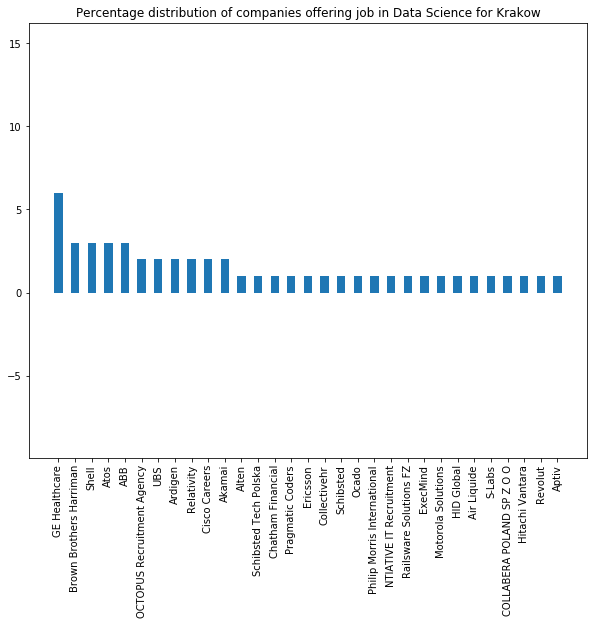

In [27]:
plt.figure(figsize=(10,8))
pd_Krakow.Company.value_counts().plot.bar()
plt.axis('equal')
plt.title('Percentage distribution of companies offering job in Data Science for Krakow')
plt.ylabel('')
plt.show()